The goal of thios projhect is to develop a method to talk about the phagocytic cup's leading edge

open X:/Phagocytosis/sRBC/20190614cs1/track_4/test/Cell_CamB_ch0_stack0034_488nm_0256014msec_0003943661msecAbs_decon.tif;
open X:/Phagocytosis/sRBC/20190614cs1/track_4/test/Cell_CamA_ch1_stack0034_560nm_0256014msec_0003943661msecAbs_decon.tif;

volume #2 style surface level 118 color #ffd059
volume #1 style surface level 73 color #2b5884

lighting full; 
lighting depthcue false; 
ui tool show Shell;

In [ ]:
from chimerax.color_key import show_key
from chimerax.core import colors
from chimerax.core.commands import (BoolArg, Bounded, CmdDesc, ColormapArg,
                                    ColormapRangeArg, Int2Arg, IntArg,
                                    SurfacesArg)
from chimerax.core.commands.cli import EnumOf
from chimerax.surface import (surface_area, vertex_convexity)
from chimerax.map.volumecommand import volume
from numpy import (arccos, array, full, inf, isnan, mean, nan, nanmax, nanmean,
                   nanmin, pi, ravel_multi_index, sign, split, sqrt, subtract,
                   swapaxes, savetxt, column_stack,nansum, count_nonzero)
from scipy.ndimage import (binary_dilation, binary_erosion,
                           generate_binary_structure, iterate_structure)
from scipy.spatial import KDTree

import matplotlib.pyplot as plt

In [ ]:
s= session
m= s.models

centroid = mean(m[3].vertices, axis = 0)

x_coord, y_coord, z_coord = split(subtract(centroid, m[1].vertices), 3, 1)

z_squared = z_coord ** 2
y_squared = y_coord ** 2
x_squared = x_coord ** 2

distance = sqrt(z_squared + y_squared + x_squared)

distxy = sqrt(x_squared + y_squared)

""
theta = sign(y_coord)*arccos(x_coord / distxy)

phi = arccos(z_coord / distance)

radius = 5

abovePhi = phi <= (pi/2)
radialClose = (distance)  < radius*.1208
radialDistanceAbovePhiLimitxy = abovePhi * radialClose * distance

m[3].radialDistanceAbovePhiNoNans= abovePhi * radialClose * distance
radialDistanceAbovePhiLimitxy[radialDistanceAbovePhiLimitxy == 0] = nan


In [ ]:
x_coord_t, y_coord_t, z_coord_t = split(subtract(centroid, m[3].vertices), 3, 1)

z_squared_t = z_coord_t ** 2
y_squared_t = y_coord_t ** 2
x_squared_t = x_coord_t ** 2

distance_t = sqrt(z_squared + y_squared + x_squared)

In [ ]:
radialClose = ((distance*.1208)  < 2.5) & ((distance*.1208)  < 2)

m[1].cup = radialClose

In [ ]:
palette = None
color_range = 'full'
measurement = m[1].cup * distnce
palette_string = 'brbg'
max_range = 15

In [ ]:
if isnan(measurement).all():
    measurement[:] = 0

In [ ]:
if palette is None:
    palette = colors.BuiltinColormaps[palette_string]

if color_range is not None and color_range != 'full':
    rmin, rmax = color_range
elif color_range == 'full':
    rmin, rmax = nanmin(measurement), nanmax(measurement)
else:
    rmin, rmax = (0, max_range)

In [ ]:
cmap = palette.rescale_range(rmin, rmax)
m[1].vertex_colors = cmap.interpolated_rgba8(measurement[:,0])

In [ ]:
zmatch = numpy.isin(z_coord_t,z_coord * radialClose) * z_coord_t
ymatch = numpy.isin(y_coord_t,y_coord * radialClose) * y_coord_t
xmatch = numpy.isin(x_coord_t,x_coord * radialClose) * x_coord_t

distancematch = sqrt(zmatch**2 + ymatch**2 + xmatch**2)
m[3].cup=distancematch

In [ ]:
palette = None
color_range = 'full'
measurement = m[3].cup
palette_string = 'brbg'
max_range = 15

if isnan(measurement).all():
    measurement[:] = 0

if palette is None:
    palette = colors.BuiltinColormaps[palette_string]

if color_range is not None and color_range != 'full':
    rmin, rmax = color_range
elif color_range == 'full':
    rmin, rmax = nanmin(measurement), nanmax(measurement)
else:
    rmin, rmax = (0, max_range)

cmap = palette.rescale_range(rmin, rmax)
m[3].vertex_colors = cmap.interpolated_rgba8(measurement[:,0])

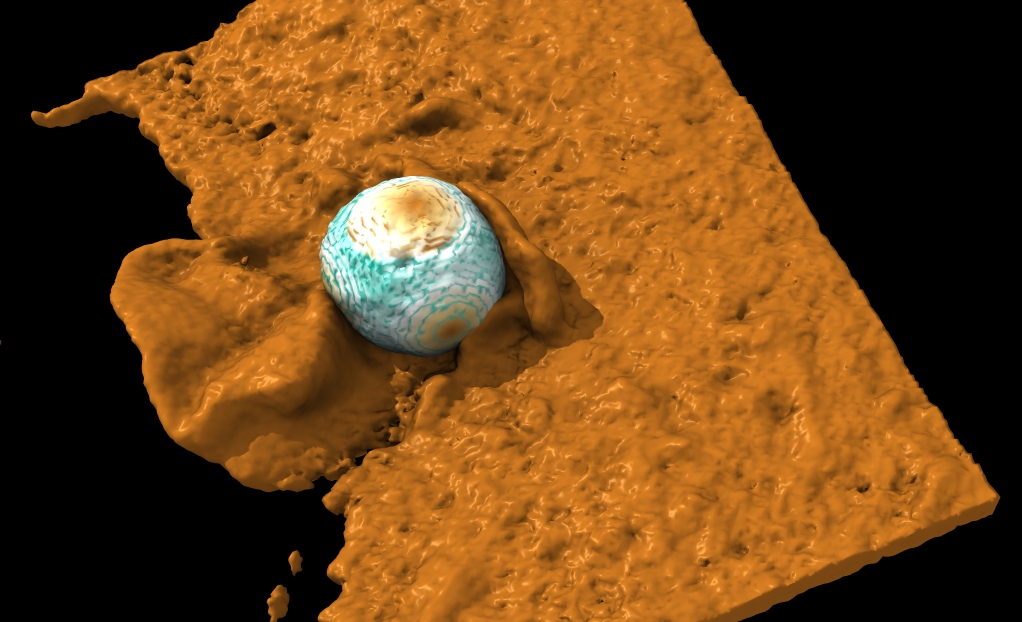

Begining a broadcasting method as opposed to the isin method that unfortunately is considering objects globally as compairible objects/veriteces

In [ ]:
a=(numpy.array(x)==numpy.array(y)[:,None]).all(2).any(axis=1)